In [52]:
import sys
import os
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.applications import densenet
from keras.layers import Conv2D, MaxPooling2D  
from keras.layers import Activation, Dropout, Flatten, Dense 
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, Callback  
from keras import regularizers  
from keras import backend as K 

#from tensorflow.python.keras import optimizers
#from tensorflow.python.keras.models import Sequential
#from tensorflow.python.keras.layers import Dropout, Flatten, Dense, Activation
#from tensorflow.python.keras.layers import  Convolution2D, MaxPooling2D
#from tensorflow.python.keras import backend as K
#import tensorflow as tf
#from tensorflow import keras
#from keras.optimizers import Adam


In [53]:

#K.clear_session()

data_entrenamiento = './train'
data_validacion = './test'


"""
Parameters
"""
epocas=10
longitud, altura = 216,384
batch_size = 1
pasos = 6
validation_steps = 300
filtrosConv1 = 32
filtrosConv2 = 64
tamano_filtro1 = (3, 3)
tamano_filtro2 = (2, 2)
tamano_pool = (2, 2)
clases = 8
lr = 1e-7
nb_train_samples = 1633   
nb_validation_samples = 810

##Preparamos nuestras imagenes
entrenamiento_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

entrenamiento_generador = entrenamiento_datagen.flow_from_directory(
    data_entrenamiento,
    target_size=(altura, longitud),
    batch_size=batch_size,
    class_mode='categorical')
validacion_generador = test_datagen.flow_from_directory(
    data_validacion,
    target_size=(altura, longitud),
    batch_size=batch_size,
    class_mode='categorical')

cnn = Sequential()
cnn.add(Conv2D(filtrosConv1, tamano_filtro1, padding ="same", input_shape=(longitud, altura, 3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=tamano_pool))

cnn.add(Conv2D(filtrosConv2, tamano_filtro2, padding ="same"))
cnn.add(MaxPooling2D(pool_size=tamano_pool))

cnn.add(Flatten())
cnn.add(Dense(256, activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(clases, activation='softmax'))


#cnn.compile(loss='categorical_crossentropy',optimizer='adam'(lr=lr), metrics=['accuracy'])
#optimizer1 = tf.keras.optimizers.Adam(lr)

#cnn.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rater=lr),metrics=['accuracy']) 
cnn.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy']) 


early_stop = EarlyStopping(monitor='val_loss', patience=8, verbose=1, min_delta=1e-4)  
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=4, verbose=1, min_delta=1e-4)  
callbacks_list = [early_stop, reduce_lr] 

model_history   =  cnn.fit(
        entrenamiento_generador,
        steps_per_epoch=pasos,
        epochs=epocas,
        validation_data=validacion_generador,
        validation_steps=nb_validation_samples // batch_size,callbacks=callbacks_list) #validation_steps)

target_dir = './modelo/'
if not os.path.exists(target_dir):
  os.mkdir(target_dir)
cnn.save('./modelo/modelo.h5')
cnn.save_weights('./modelo/pesos.h5')



Found 1633 images belonging to 8 classes.
Found 810 images belonging to 8 classes.
Epoch 1/10
6/6 [==============================] - 53s 10s/step - loss: 11.8569 - accuracy: 0.3333 - val_loss: 23.7483 - val_accuracy: 0.5667 - lr: 0.0010
Epoch 2/10
6/6 [==============================] - 53s 10s/step - loss: 16.5202 - accuracy: 0.1667 - val_loss: 5.0728 - val_accuracy: 0.2889 - lr: 0.0010
Epoch 3/10
6/6 [==============================] - 49s 10s/step - loss: 13.3662 - accuracy: 0.1667 - val_loss: 11.0750 - val_accuracy: 0.5667 - lr: 0.0010
Epoch 4/10
6/6 [==============================] - 51s 10s/step - loss: 6.7517 - accuracy: 0.6667 - val_loss: 3.6267 - val_accuracy: 0.5617 - lr: 0.0010
Epoch 5/10
6/6 [==============================] - 50s 10s/step - loss: 4.5200 - accuracy: 0.6667 - val_loss: 4.0327 - val_accuracy: 0.5704 - lr: 0.0010
Epoch 6/10
6/6 [==============================] - 51s 10s/step - loss: 5.1620 - accuracy: 0.3333 - val_loss: 8.0901 - val_accuracy: 0.5691 - lr: 0.0010


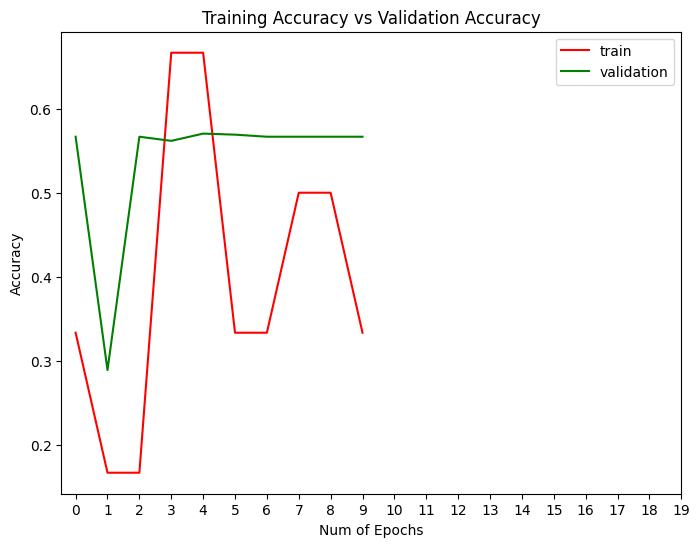

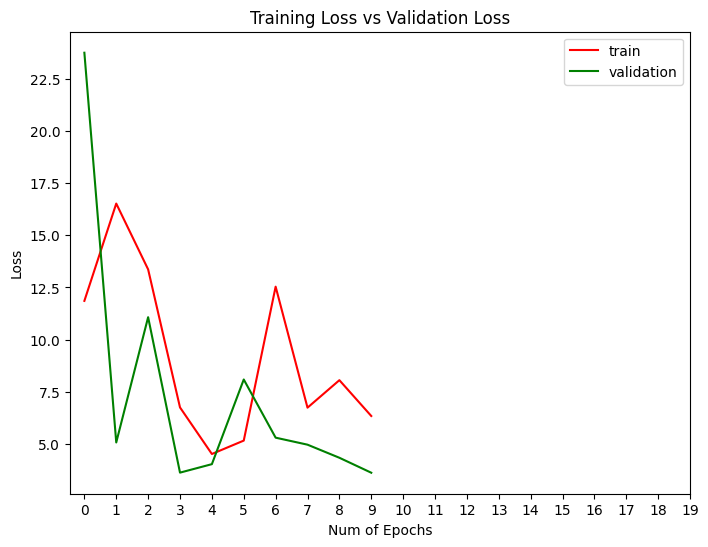

In [54]:
import matplotlib.pyplot as plt 
import numpy as np
 
plt.figure(0)  
plt.plot(model_history.history['accuracy'],'r')  
plt.plot(model_history.history['val_accuracy'],'g')  
plt.xticks(np.arange(0, 20, 1.0))  
plt.rcParams['figure.figsize'] = (8, 6)  
plt.xlabel("Num of Epochs")  
plt.ylabel("Accuracy")  
plt.title("Training Accuracy vs Validation Accuracy")  
plt.legend(['train','validation'])

plt.figure(1)  
plt.plot(model_history.history['loss'],'r')  
plt.plot(model_history.history['val_loss'],'g')  
plt.xticks(np.arange(0, 20, 1.0))  
plt.rcParams['figure.figsize'] = (8, 6)  
plt.xlabel("Num of Epochs")  
plt.ylabel("Loss")  
plt.title("Training Loss vs Validation Loss")  
plt.legend(['train','validation'])



plt.show()  

In [56]:
cnn.evaluate(validacion_generador, steps=None, max_queue_size=10, workers=1, use_multiprocessing=False)  

810/810 [==============================] - 48s 60ms/step - loss: 3.6222 - accuracy: 0.5667


[3.622237205505371, 0.5666666626930237]

In [58]:
pred = cnn.predict(validacion_generador, steps=None, max_queue_size=10, workers=1, use_multiprocessing=False, verbose=1)  
predicted = np.argmax(pred, axis=1)

810/810 [==============================] - 51s 62ms/step


In [62]:
dirname_test = os.path.join(os.getcwd(), 'test')
imgpath_test = dirname_test + os.sep 

images_test = []
directories_test = []
dircount_test = []
prevRoot_test=''
cant_test=0

print("leyendo imagenes de testeo: ",imgpath_test)

for root, dirnames, filenames in os.walk(imgpath_test):
    for filename in filenames:
        if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):
            cant_test=cant_test+1
            filepath = os.path.join(root, filename)
            image = plt.imread(filepath)
            images_test.append(image)
            b = "Leyendo..." + str(cant_test)
            print (b, end="\r")
            if prevRoot_test !=root:
                print(root, cant_test)
                prevRoot_test=root
                directories_test.append(root)
                dircount_test.append(cant_test)
                cant_test=0
dircount_test.append(cant_test)

dircount_test = dircount_test[1:]
dircount_test[0]=dircount_test[0]+1
print('Directorios leidos:',len(directories_test))
print("Imagenes en cada directorio", dircount_test)
print('suma Total de imagenes en subdirs:',sum(dircount_test))
labels_test=[]
indice_test=0
for cantidad in dircount_test:
    for i in range(cantidad):
        labels_test.append(indice_test)
    indice_test=indice_test+1
print("Cantidad etiquetas creadas: ",len(labels_test))
y_test = np.array(labels_test)
classes_test = np.unique(y_test)
nClasses_test = len(classes_test)
train_Y_one_hot = to_categorical(y_test)

leyendo imagenes de testeo:  c:\Users\vilas\Documents\TRATAMIENTO_DATOS\prueba_final_modulo\proyecto_final_modulo\test\
c:\Users\vilas\Documents\TRATAMIENTO_DATOS\prueba_final_modulo\proyecto_final_modulo\test\CLASS_01 1
c:\Users\vilas\Documents\TRATAMIENTO_DATOS\prueba_final_modulo\proyecto_final_modulo\test\CLASS_02 1
c:\Users\vilas\Documents\TRATAMIENTO_DATOS\prueba_final_modulo\proyecto_final_modulo\test\CLASS_03 48
c:\Users\vilas\Documents\TRATAMIENTO_DATOS\prueba_final_modulo\proyecto_final_modulo\test\CLASS_04 97
c:\Users\vilas\Documents\TRATAMIENTO_DATOS\prueba_final_modulo\proyecto_final_modulo\test\CLASS_05 45
c:\Users\vilas\Documents\TRATAMIENTO_DATOS\prueba_final_modulo\proyecto_final_modulo\test\CLASS_06 459
c:\Users\vilas\Documents\TRATAMIENTO_DATOS\prueba_final_modulo\proyecto_final_modulo\test\CLASS_07 19
c:\Users\vilas\Documents\TRATAMIENTO_DATOS\prueba_final_modulo\proyecto_final_modulo\test\CLASS_08 114
Directorios leidos: 8
Imagenes en cada directorio [2, 48, 97, 45

In [63]:
def predict_one(model):  
    image_batch, classes_batch = next(validacion_generador)
    predicted_batch = model.predict(image_batch)
    for k in range(0,image_batch.shape[0]):
      image = image_batch[k]
      pred = predicted_batch[k]
      the_pred = np.argmax(pred)
      predicted = train_Y_one_hot[the_pred]
      val_pred = max(pred)
      the_class = np.argmax(classes_batch[k])
      value = train_Y_one_hot[np.argmax(classes_batch[k])]
      plt.figure(k)
      isTrue = (the_pred == the_class)
      plt.title(str(isTrue) + ' - class: ' + value + ' - ' + 'predicted: ' + predicted + '[' + str(val_pred) + ']')
      plt.imshow(image)

predict_one(cnn) 

ValueError: in user code:

    File "c:\Users\vilas\Documents\TRATAMIENTO_DATOS\prueba_final_modulo\proyecto_final_modulo\venv\Lib\site-packages\keras\engine\training.py", line 2169, in predict_function  *
        return step_function(self, iterator)
    File "c:\Users\vilas\Documents\TRATAMIENTO_DATOS\prueba_final_modulo\proyecto_final_modulo\venv\Lib\site-packages\keras\engine\training.py", line 2155, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\vilas\Documents\TRATAMIENTO_DATOS\prueba_final_modulo\proyecto_final_modulo\venv\Lib\site-packages\keras\engine\training.py", line 2143, in run_step  **
        outputs = model.predict_step(data)
    File "c:\Users\vilas\Documents\TRATAMIENTO_DATOS\prueba_final_modulo\proyecto_final_modulo\venv\Lib\site-packages\keras\engine\training.py", line 2111, in predict_step
        return self(x, training=False)
    File "c:\Users\vilas\Documents\TRATAMIENTO_DATOS\prueba_final_modulo\proyecto_final_modulo\venv\Lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\vilas\Documents\TRATAMIENTO_DATOS\prueba_final_modulo\proyecto_final_modulo\venv\Lib\site-packages\keras\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_14" is incompatible with the layer: expected shape=(None, 216, 384, 3), found shape=(None, 384, 216, 3)
